## Loading Dependencies

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

## 1) Understanding and pre-processing the dataset

In [6]:
print("Training set shape: ", x_train.shape)
print("Testing set shape: ", x_test.shape)

Training set shape:  (60000, 28, 28)
Testing set shape:  (10000, 28, 28)


### a) Display the number of classes

In [7]:
unq_class, counts = np.unique(y_train, return_counts = True)
print("There are", len(unq_class), "output classes, with numeric labels: ", unq_class)

There are 10 output classes, with numeric labels:  [0 1 2 3 4 5 6 7 8 9]


In [8]:
print("The distribution of the class labels in the training set is: ", counts)

The distribution of the class labels in the training set is:  [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


### b) display dimension of each image

In [9]:
print("Dimensions of image = ", x_train[0].shape) ##Dimension found by finding the shape of one random image

Dimensions of image =  (28, 28)


### c) Display one image from each class

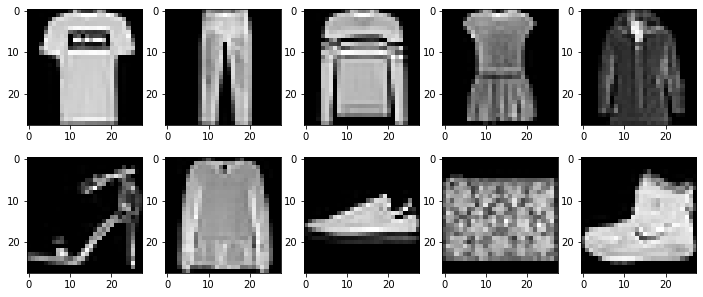

In [10]:
(x, id) = np.unique(y_train, return_index = True)
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[id[i]], cmap="gray")

### d) Normalization

In [11]:
# Normalizing the pixel values to (0,1) and reshaping for CNNs
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

## 2) Performing experiments on Fully Connected Neural Networks

### a) Model building

In [12]:
#Building the FCNN model
model_fcnn = tf.keras.Sequential()
model_fcnn.add(tf.keras.layers.Input(shape = (28, 28, 1))) ##Input layer shape corresponds to the image dimensions
model_fcnn.add(tf.keras.layers.Flatten()) ## We must flatten the image before passing it to the dense layers
model_fcnn.add(tf.keras.layers.Dense(256, activation = "relu")) ## First hidden layer with 256 neurons
model_fcnn.add(tf.keras.layers.Dense(256, activation = "relu")) ## Second hidden layer with 256 neurons
model_fcnn.add(tf.keras.layers.Dense(100, activation = "relu")) ## Third hidden layer with 100 neurons
model_fcnn.add(tf.keras.layers.Dense(10, activation = "softmax")) ## Ouput layer with 10 neurons corresponding to the 10 output classes

In [13]:
#Summary of the built FCNN model
model_fcnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293,462 (1.12 MB)

 Trainable params: 293,462 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compiling the FCNN model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_fcnn.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"]) #Loss function is sparse categorical cross-entropy since the output labels are numeric

### b) Train and test the network

In [15]:
#Setting up the hyperparameters
batch_size = 32
epochs = 15

#Fitting the model
res_fcnn = model_fcnn.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7787 - loss: 0.6262 - val_accuracy: 0.8440 - val_loss: 0.4294
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8631 - loss: 0.3706 - val_accuracy: 0.8700 - val_loss: 0.3556
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8776 - loss: 0.3313 - val_accuracy: 0.8808 - val_loss: 0.3336
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8864 - loss: 0.3024 - val_accuracy: 0.8735 - val_loss: 0.3487
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8910 - loss: 0.2921 - val_accuracy: 0.8798 - val_loss: 0.3225
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8974 - loss: 0.2727 - val_accuracy: 0.8833 - val_loss: 0.3309
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9015 - loss: 0.2625 - val_accuracy: 0.8852 - val_loss: 0.3195
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9061 - loss: 0.2511 - 

In [16]:
#Evaluation of the model with loss and accuracy values
loss, accuracy = model_fcnn.evaluate(x_test, y_test)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8854 - loss: 0.3506
Accuracy:  0.8834999799728394
Loss:  0.35356229543685913


### d) Plot model perfromance

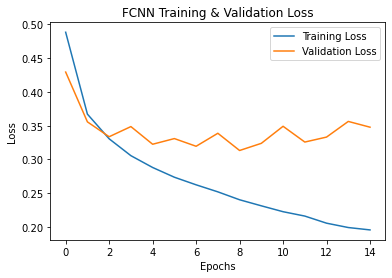

In [17]:
plt.plot(res_fcnn.history['loss'], label = "Training Loss") ##Plotting the training curve
plt.plot(res_fcnn.history['val_loss'], label = "Validation Loss") ##Plotting the validation curve
plt.title('FCNN Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3) Experiment on CNN

### a) Design CNN-1

In [18]:
#Building the CNN-1 model
model_cnn1 = tf.keras.Sequential()
model_cnn1.add(tf.keras.layers.Input(shape = (28, 28, 1))) ##Input layer
model_cnn1.add(tf.keras.layers.Conv2D(32, kernel_size = (5,5), activation = "relu", strides = 1, padding = "valid")) ##First 2D Convolution layer with 32 kernels
model_cnn1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2)) ##2D Pooling layer using MaxPooling
model_cnn1.add(tf.keras.layers.Flatten()) ##Flattening layer to convert the values to pass to the output layer
model_cnn1.add(tf.keras.layers.Dense(100, activation = "relu")) ##Hidden layer with 100 neurons
model_cnn1.add(tf.keras.layers.Dense(10, activation = "softmax")) ##Output layer with 10 neurons

In [19]:
# Summary of CNN-1 model
model_cnn1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         460,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,742 (1.77 MB)

 Trainable params: 462,742 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

### b) Design CNN-2

In [42]:
#Building the CNN-2 model
model_cnn2 = tf.keras.Sequential()
model_cnn2.add(tf.keras.layers.Input(shape = (28, 28, 1))) #Input Layer
model_cnn2.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", strides = 1, padding = "valid")) ##First 2D Convolution layer with 32 kernels
model_cnn2.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", strides = 1, padding = "valid")) ##Second 2D Convolution layer with 32 kernels
model_cnn2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2)) ##2D Pooling layer with MaxPooling
model_cnn2.add(tf.keras.layers.Flatten()) ##Flattening layer to convert the values to pass to the output layer
model_cnn2.add(tf.keras.layers.Dense(100, activation = "relu")) ##Hidden layer with 100 neurons
model_cnn2.add(tf.keras.layers.Dense(10, activation = "softmax")) ##Output layer with 10 neurons

### c) Training and testing two model
#### Model-1

In [21]:
#Compiling the CNN-1
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_cnn1.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
#Defining the hyperparameters
batch_size = 32
epochs = 30

In [23]:
#Fitting CNN-1
res_cnn1 = model_cnn1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4436 - loss: 1.7537 - val_accuracy: 0.5835 - val_loss: 1.1273
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5830 - loss: 1.0412 - val_accuracy: 0.6805 - val_loss: 0.8947
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7048 - loss: 0.8327 - val_accuracy: 0.7727 - val_loss: 0.7248
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8047 - loss: 0.6734 - val_accuracy: 0.8593 - val_loss: 0.5864
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8796 - loss: 0.5291 - val_accuracy: 0.8773 - val_loss: 0.4931
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9014 - loss: 0.4320 - val_accuracy: 0.8850 - val_loss: 0.4429
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9098 - loss: 0.3765 - val_accuracy: 0.8865 - val_loss: 0.4103
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9201 - loss: 0.3249 

In [24]:
#Testing CNN-1
loss1, accuracy1 = model_cnn1.evaluate(x_test, y_test)
print("Accuracy: ", accuracy1)
print("Loss: ", loss1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.4887
Accuracy:  0.8989999890327454
Loss:  0.469739705324173


#### Model-2

In [44]:
# Compiling the CNN-2
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn2.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [45]:
#Fitting CNN-2
res_cnn2 = model_cnn2.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8056 - loss: 0.5476 - val_accuracy: 0.8913 - val_loss: 0.2962
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9026 - loss: 0.2685 - val_accuracy: 0.9030 - val_loss: 0.2646
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9230 - loss: 0.2073 - val_accuracy: 0.9127 - val_loss: 0.2415
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9397 - loss: 0.1630 - val_accuracy: 0.9218 - val_loss: 0.2184
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9513 - loss: 0.1300 - val_accuracy: 0.9165 - val_loss: 0.2442
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9626 - loss: 0.1029 - val_accuracy: 0.9212 - val_loss: 0.2431
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9703 - loss: 0.0782 - val_accuracy: 0.9198 - val_loss: 0.2626
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9782 - loss

In [46]:
#Testing CNN-2
loss2, accuracy2 = model_cnn2.evaluate(x_test, y_test)
print("Accuracy: ", accuracy2)
print("Loss: ", loss2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9134 - loss: 0.8489
Accuracy:  0.9139000177383423
Loss:  0.8455385565757751


### d) Plotting performance of CNN-1 and CNN-2

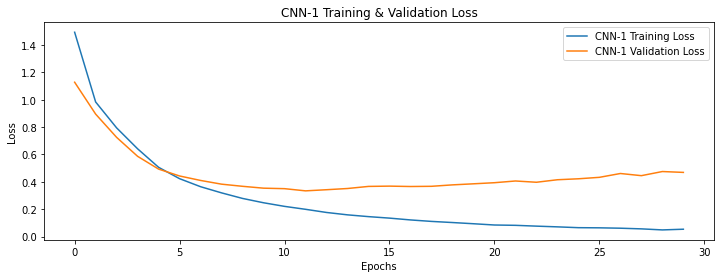

In [48]:
#CNN-1
plt.figure(figsize = (12, 4))
plt.plot(res_cnn1.history['loss'], label = "CNN-1 Training Loss")
plt.plot(res_cnn1.history['val_loss'], label = "CNN-1 Validation Loss")
plt.title('CNN-1 Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

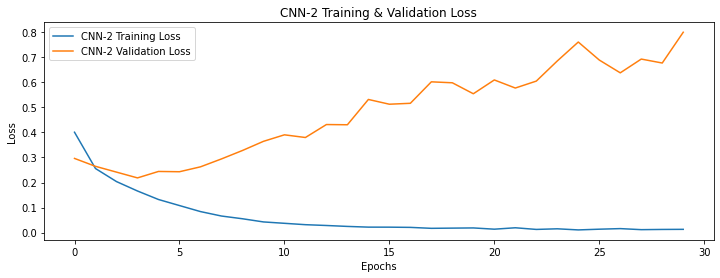

In [49]:
#CNN-2
plt.figure(figsize = (12, 4))
plt.plot(res_cnn2.history['loss'], label = "CNN-2 Training Loss")
plt.plot(res_cnn2.history['val_loss'], label = "CNN-2 Validation Loss")
plt.title('CNN-2 Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### e) Compare the performances of CNN-1 and CNN-2

In [50]:
print("CNN-1: Accuracy = ", accuracy1, ", Loss = ", loss1)
print("CNN-2: Accuracy = ", accuracy2, ", Loss = ", loss2)

CNN-1: Accuracy =  0.8989999890327454 , Loss =  0.469739705324173
CNN-2: Accuracy =  0.9139000177383423 , Loss =  0.8455385565757751


In [31]:
# We see that both the CNN models have similar, and inefficient accuracy values. But CNN-1 has lower loss value than CNN-2

In [51]:
#Finding the predictions by each model
y_pred1 = model_cnn1.predict(x_test)
y_pred2 = model_cnn2.predict(x_test)
y_pred = model_fcnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step


In [52]:
# Classification Report for CNN-1
print(classification_report(y_test, np.argmax(y_pred1, axis = 1), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.79      0.82      1000
           3       0.89      0.91      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.70      0.75      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [53]:
# Classification Report for CNN-2
print(classification_report(y_test, np.argmax(y_pred2, axis = 1), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.86      0.87      1000
           3       0.93      0.92      0.92      1000
           4       0.90      0.85      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.70      0.83      0.76      1000
           7       0.97      0.96      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



## 4) Compare the performances of FCNN and CNN

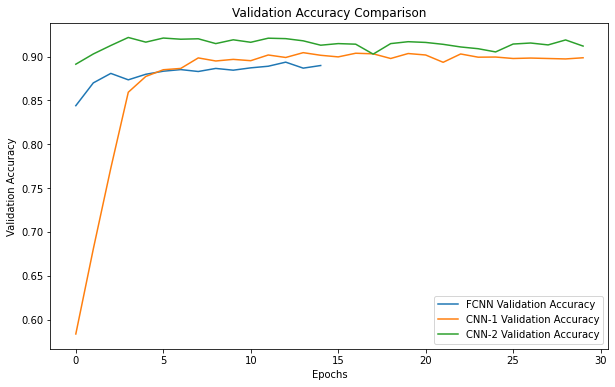

In [54]:
# Plot validation accuracy for all models
plt.figure(figsize=(10,6))
plt.plot(res_fcnn.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.plot(res_cnn1.history['val_accuracy'], label='CNN-1 Validation Accuracy')
plt.plot(res_cnn2.history['val_accuracy'], label='CNN-2 Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [55]:
#Printing the test set accuracies of the 3 models
print("Test Set Accuracies:")
print(f"FCNN:  {model_fcnn.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print(f"CNN-1: {model_cnn1.evaluate(x_test, y_test, verbose=0)[1]:.4f}")
print(f"CNN-2: {model_cnn2.evaluate(x_test, y_test, verbose=0)[1]:.4f}")

Test Set Accuracies:
FCNN:  0.8835
CNN-1: 0.8990
CNN-2: 0.9139


In [59]:
#Printing the classification report for the 3 models for performance comparison
print(classification_report(y_test, np.argmax(y_pred1, axis = 1), zero_division=0.0))
print(classification_report(y_test, np.argmax(y_pred2, axis = 1), zero_division=0.0))
print(classification_report(y_test, np.argmax(y_pred, axis = 1), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.79      0.82      1000
           3       0.89      0.91      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.70      0.75      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.86      0.87      1000
           3       0.93 

## 5) Compare the number of parameters in the FCNN and the CNN

In [60]:
#Printing the total number of parameters in each model
print("Total parameters in FCNN: ", model_fcnn.count_params())
print("Total parameters in CNN-1: ", model_cnn1.count_params())
print("Total parameters in CNN-2: ", model_cnn2.count_params())

Total parameters in FCNN:  293462
Total parameters in CNN-1:  462852
Total parameters in CNN-2:  471478


In [61]:
#The model summary for each model
model_fcnn.summary()
model_cnn1.summary()
model_cnn2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 880,388 (3.36 MB)

 Trainable params: 293,462 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 586,926 (2.24 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         460,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,388,558 (5.30 MB)

 Trainable params: 462,852 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 925,706 (3.53 MB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         460,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,414,436 (5.40 MB)

 Trainable params: 471,478 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 942,958 (3.60 MB)